# 1.) Import the Credit Card Fraud Data From CCLE

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv(r"fraudTest.csv")

In [8]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
df['trans_date_trans_time']

0         2020-06-21 12:14:25
1         2020-06-21 12:14:33
2         2020-06-21 12:14:53
3         2020-06-21 12:15:15
4         2020-06-21 12:15:17
                 ...         
555714    2020-12-31 23:59:07
555715    2020-12-31 23:59:09
555716    2020-12-31 23:59:15
555717    2020-12-31 23:59:24
555718    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: object

# 2.) Select four columns to use as features (one just be trans_date_trans)

In [12]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [13]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a your own variable out of trans_date. Create dummies for factor vars

In [14]:
type(df_select["trans_date_trans_time"][0])

str

In [15]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\2067604160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [16]:
df_select["time_var"] = [1 if i.hour>=0 and i.hour<6 else 0 for i in df_select["trans_date_trans_time"]] #a time_var that captures whether or not it is between midnight and 6am i.e. night or not

C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\2539205381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [1 if i.hour>=0 and i.hour<6 else 0 for i in df_select["trans_date_trans_time"]] #a time_var that captures whether or not it is between midnight and 6am i.e. night or not


In [17]:
df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,0
4,2020-06-21 12:15:17,travel,3.19,1126,0,0


In [18]:
orig_sample = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time"], axis = 1)
orig_sample.head()

,amt,city_pop,is_fraud,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 4.) Resampling (Extra Credit)

In [19]:
from pandas.core.common import random_state
from sklearn.utils import resample

In [20]:
df_minority = orig_sample[orig_sample['is_fraud'] == 1]
df_majority = orig_sample[orig_sample['is_fraud'] == 0]


df_minority_upsampled = resample(df_minority, replace=True, n_samples = len(df_majority), random_state = 88)
df_minority_upsampled.head()

,amt,city_pop,is_fraud,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
457053,1015.53,54767,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
89772,22.02,1228,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
138234,7.30,3395,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
343702,7.38,4720,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
354302,10.58,1360,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
len(df_minority_upsampled)

553574

In [22]:
len(df_majority)

553574

In [23]:
bal_samp = pd.concat([df_minority_upsampled,df_majority], axis=0,ignore_index=True)
bal_samp.head()

,amt,city_pop,is_fraud,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,1015.53,54767,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,22.02,1228,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7.30,3395,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7.38,4720,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,10.58,1360,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
bal_samp.columns

Index(['amt', 'city_pop', 'is_fraud', 'time_var', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [25]:
X = bal_samp[['amt', 'city_pop', 'time_var', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]
y = bal_samp["is_fraud"]

In [26]:
len(X)

1107148

In [27]:
len(y)

1107148

# 5.) Train a Logistic regression.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[-7.64525883e-01, -2.80169187e-01,  1.62961875e+00, ...,
        -4.29172195e-01, -3.22591419e-01, -1.60436962e-01],
       [ 2.16984256e+00, -2.82378511e-01, -6.13640459e-01, ...,
        -4.29172195e-01,  3.09989647e+00, -1.60436962e-01],
       [-5.75307402e-01, -2.89284074e-01,  1.62961875e+00, ...,
        -4.29172195e-01, -3.22591419e-01, -1.60436962e-01],
       ...,
       [ 1.13765438e-01, -2.80644515e-01,  1.62961875e+00, ...,
        -4.29172195e-01, -3.22591419e-01, -1.60436962e-01],
       [-7.77281590e-01, -2.73122926e-01, -6.13640459e-01, ...,
        -4.29172195e-01, -3.22591419e-01, -1.60436962e-01],
       [ 9.91421620e-01, -1.32663946e-03, -6.13640459e-01, ...,
        -4.29172195e-01,  3.09989647e+00, -1.60436962e-01]])

In [31]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)
X_test

array([[-7.68671987e-02,  1.99261778e+00, -6.12470037e-01, ...,
        -4.26533421e-01, -3.23876538e-01, -1.59953770e-01],
       [ 2.24731991e+00, -2.75558018e-01, -6.12470037e-01, ...,
         2.34448217e+00, -3.23876538e-01, -1.59953770e-01],
       [-7.74846794e-01, -2.87962516e-01, -6.12470037e-01, ...,
        -4.26533421e-01,  3.08759629e+00, -1.59953770e-01],
       ...,
       [-6.68712310e-01,  6.35475851e-02, -6.12470037e-01, ...,
        -4.26533421e-01, -3.23876538e-01, -1.59953770e-01],
       [ 1.56418468e+00, -2.83565937e-01, -6.12470037e-01, ...,
         2.34448217e+00, -3.23876538e-01, -1.59953770e-01],
       [-1.46643159e-03, -2.75432835e-01, -6.12470037e-01, ...,
        -4.26533421e-01, -3.23876538e-01, -1.59953770e-01]])

In [32]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [33]:
pred = log_reg.predict(X_test)

c:\users\lisam\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


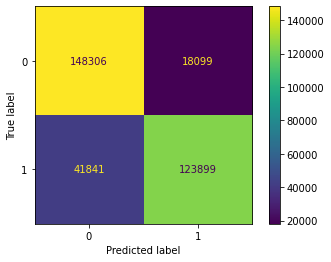

In [34]:
plot_confusion_matrix(log_reg, X_test, y_test)


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [107]:
pred_p = log_reg.predict_proba(X_train)

In [108]:
result = pd.DataFrame(pred_p)

In [109]:
result.head()

,0,1
0,0.570432,0.429568
1,0.001664,0.998336
2,0.580781,0.419219
3,0.732864,0.267136
4,0.996793,0.003207


In [110]:
result['threshold'] = np.nan
result['prediction'] = np.nan

In [111]:
result.head()

,0,1,threshold,prediction
0,0.570432,0.429568,NaN,NaN
1,0.001664,0.998336,NaN,NaN
2,0.580781,0.419219,NaN,NaN


In [112]:
result['true'] = y_train.values

In [113]:
result.columns = ['not_fraud', 'fraud', 'threshold', 'prediction', 'true']

In [114]:
result.head()

,not_fraud,fraud,threshold,prediction,true
0,0.570432,0.429568,NaN,NaN,1
1,0.001664,0.998336,NaN,NaN,1
2,0.580781,0.419219,NaN,NaN,0
3,0.732864,0.267136,NaN,NaN,1
4,0.996793,0.003207,NaN,NaN,0


In [92]:
opt = pd.DataFrame(columns=['threshold', 'false_positive_rate'])

for i in np.linspace(0.5,1,100):
    result['threshold'] = i
    result['prediction'] = np.where(result['fraud']>result['threshold'],1,0)
    matrix = confusion_matrix(result['true'], result['prediction'])
    FP = matrix[0,1]
    TN = matrix[0,0]
    false_positive_rate = (FP/(TN+FP))
    temp = {'threshold': i, 'false_positive_rate': false_positive_rate}
    opt = opt.append(temp, ignore_index=True)

C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppDa

C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppDa

C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppData\Local\Temp\ipykernel_11212\1042991553.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opt = opt.append(temp, ignore_index=True)
C:\Users\lisam\AppDa

In [93]:
opt[(opt['false_positive_rate']<0.051) & (opt['false_positive_rate']>0.049)]

,threshold,false_positive_rate
18,0.590909,0.050523


# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [75]:
origdata = pd.DataFrame(log_reg.predict_proba(X))
origdata.rename({0:'not_fraud', 1:'fraud'}, axis =1, inplace = True)
origdata['pred'] = np.where(origdata['fraud']>origdata['not_fraud'],1,0)
origdata.head()


c:\users\lisam\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,not_fraud,fraud,pred
0,1.0,0.000000e+00,0
1,1.0,7.775752e-45,0
2,1.0,1.373656e-217,0
3,1.0,2.121685e-307,0
4,1.0,9.636520e-74,0


In [76]:
def rev(pred, true, trans, fee):
  if pred == true:
    return trans*fee

  else:
    return trans*-1

     


In [77]:
np.vectorize(rev)(origdata['pred'], y, X['amt'], 0.02).sum()


-82057603.56859997

In [ ]:
rev = -1
comm = 0.02

while rev < 0:
  for fee in np.linspace(0.02,0.5, 100):
    rev = np.vectorize(rev)(origdata['pred'], y, X['amt'], comm).sum()
    #rev = sum(rev)
    
else:
  print(f'Revenue: {rev}, Commission: {fee}')

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [118]:
logistic_lasso = LogisticRegression("l2")


In [119]:
log_lass_mod = logistic_lasso.fit(X,y)


c:\users\lisam\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


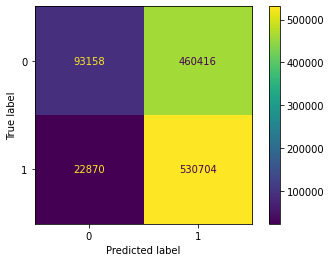

In [121]:
plot_confusion_matrix(log_lass_mod, X, y)
plt.show()

This model should not be trusted as it has a high false positive rate.

In [126]:
false_positive_rate = (460416/(93158+460416))
false_positive_rate

0.8317153623544459